# Calculating $\pi$ using Monte Carlo Methods
---------------------------------------------

# Background 

`Pi` is in fact what mathematicians call an irrational number, meaning that it is a number that can't be written as a simple fraction, or in other words it has an infinite, non-repeating number of decimal digits. Move over 3.14 - here is the value of `Pi` to 100 digits:
 
```
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679
```
 
If you think that's too much to retain, in October 2015 Suresh Kumar Sharma of India recited 70,030 digits of `Pi` in just over 17 hours.
 
The fact that `Pi` is infinite hasn't stopped mathematicians trying to calculate it to as many digits as possible.  In November 2016, Peter Trueb used some fairly chunky computing power to calculate it to 22,459,157,718,361 decimal places.

In this exercise, we will approximate `Pi` by throwing darts at a dart board using Monte Carlo simulation [Monte Carlo simulation](https://www.ibm.com/cloud/learn/monte-carlo-simulation). Monte Carlo methods employ statistical algorithms to estimate an unknown quantity. For us, this unknown quantity is . The method starts by inscribing a circle inside of a square.


Write a program to create the square and circle and randomly create points that fall within the square. Count the number of points that fall within the circle. Finally, compute the ratio of the number of points in the circle to the total number of points.

![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

_Figure. The circle and the square give us our dartboard and back-board respectively, with the circle fitting perfectly inside the square with a radius of 1._


## Methodology

The definition of a circle is a point, called the center, and all the points that are equal distance from the center. Given the center of the circle, use the distance function to test if a random point is inside the circle; that is, the distance from the point to the circle's center is less than the circle’s radius.

- Area of a square: $s_{area} = (2 r)^2$
- Area of the circle: $c_{area} = \pi r^2$
- $c_{area}/s_{area} = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

In [71]:
# Importing modules that we will need
import random
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from sklearn.linear_model import LinearRegression

In [18]:
# Initializing the number of samples in Monte Carlo simulation (ie. dart throws)
num_points = 1000

In [33]:
# Generate random `x,y` coordinates (ie. the dart throws) and count the number of hits
points = np.random.rand(num_points, 2) #generate random pts
ishit = np.sqrt(points[:,0] ** 2 + points[:,1] ** 2) <= 1 #test if dart is in circle
hits = np.sum(ishit)
colors = ['r' if hitelement else 'b' for hitelement in ishit] #set color to red if in circle and blue otherwise

<img src="assets/2022-03-29-08-55-06.png" width="50%">

_Figure: Plot your dart throws using matplotlib simular to that shown in the figure._

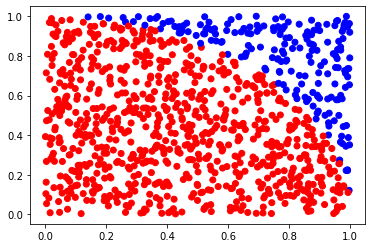

In [31]:
# Plot the points using matplotlib similar to Figure above
plt.scatter(x = points[:,0], y = points[:,1], c = colors)
plt.show()

In [25]:
# Compute pi from your simulation data and print the estimate
fraction = hits / num_points
4 * fraction

3.2

In [65]:
num_points_set = np.array(list(10 ** i for i in range(8)))

#num_points_set = [10, 100, 10000, 1000000, 100000000]
times = np.zeros(8)
pis = np.zeros(8)
count = 0
for num_points in num_points_set:
    start = time.perf_counter()
    points = np.random.rand(num_points, 2) #generate random pts
    hits = np.sum(np.sqrt(points[:,0] ** 2 + points[:,1] ** 2) <= 1) #test and count if dart is in circle
    fraction = 4 * hits / num_points
    pis[count] = fraction
    end = time.perf_counter()
    times[count] = end - start
    count += 1
print(num_points_set)
print(pis)
print(times)

[       1       10      100     1000    10000   100000  1000000 10000000]
[4.       2.4      2.84     3.156    3.1444   3.13732  3.14412  3.141728]
[1.82664000e-01 4.46000004e-05 3.00000002e-05 1.75499999e-04
 4.94900000e-04 5.77750000e-03 4.12440000e-02 3.55150700e-01]


In [67]:
deltas = np.log(abs(pis - math.pi))
print(deltas)

[-0.15267653 -0.29895517 -1.198678   -4.24001704 -5.87551558 -5.4555202
 -5.98058538 -8.90767306]


[]

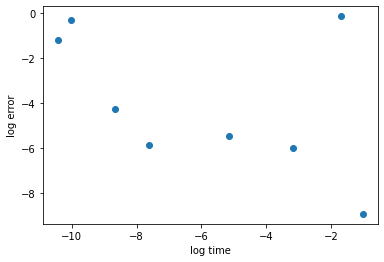

In [70]:
plt.scatter(x = np.log(times), y = deltas)
plt.xlabel("log time")
plt.ylabel("log error")
plt.plot()

In [80]:
model = LinearRegression() #https://realpython.com/linear-regression-in-python/
model.fit(deltas.reshape(-1, 1), np.log(times))
ypred = model.predict([[-70030]])
print(ypred)

[38180.95217857]


# Results

Construct a table (using markdown) to benchmark a series of experiments for `n` number of points. Also, include the time (in seconds) that the simulation took to run. Only include the time needed to simulate the points and estimate $\pi$. Do not include the time to plot the data.

| $n$ points | time (seconds) | value of $\pi$ | 
|----------|------|----------------|
|     1    |   1.83e-01   |        4        |
|      10    |   4.46e-05    |       2.4         |
|      100    |   3.00e-05   |        2.84        |
|      1000    |   1.75e-04   |        3.156        |
|      10000   |   4.95e-04   |        3.1444        |
|      100000     |  5.78e-03    |       3.13732         |
|      1000000     |  4.12e-02    |       3.14412         |
|      10000000    |  3.55e-01   |       3.141728        |

# Conclusion 

Please answer the foolowing questions:

* Considering the numeric types used in this calculation, what is the actual accuracy of this calculation?
* Given your implementation, approximate how long it would take to compute $\pi$ to 70,030 digits. 


Assuming that floats have fifty three bits of precision, we have fifteen digits of precision. The calculation will be accurate to fifteen digits assuming that the error comes from calculating and storing the fraction representing pi. No error is introduced by integers as they are boundless. There may be error introduced in the calculation from if a point is within the circle. However, I do not know how to accurately calculate how the error in the inputs will influence the error of the count of points within circle calculation so this is ignored.

Given the implementation, ignoring above limitation, and assuming that there is a linear relation between log time and log error of the estimate of pi, using linear regression, we get that to compute pi down to 70,030 digits it would take $10^{38181}$ seconds which is not realistic for usage.